# Лабораторная работа №1. Построение идеальной хеш-таблицы

#### **Выполнили:** Кислицына Анастасия, Куклин Максим

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [96]:
root = '/home/maxim/Downloads/Telegram Desktop/data_lab_best_v2/'

results_files = os.listdir(root)
results_files = [os.path.join(root,x) for x in results_files if x.endswith('.csv')]

In [97]:
def draw_results(data, hue='C', name=None, xlim=None, ylim=None):
    
    c_num = np.unique(np.array(data[hue])).size
    palette = sns.color_palette("mako_r", c_num)

    fig, axs = plt.subplots(ncols=2)
    fig.suptitle(name)
    fig.tight_layout()
    fig.set_size_inches(12,5)
    
    sns.lineplot(data=data, x="DataN", y='BuildTime', hue = hue,
                     palette=palette, 
                     markers=True, ci=0, ax=axs[0])
    axs[0].set(ylabel='BuildTime (ms)')
    sns.lineplot(data=data, x="DataN", y='Memory', hue = hue, 
                     palette=palette, 
                     markers=True, ci=0, ax=axs[1])
    axs[1].set(ylabel='Memory (KB)')

**Примечание**: все графики, составленные для замеров времени измеряются в **миллисекундах**. Графики для подсчёта потребляемой памяти измеряются в **Кбайт**. 

## Алгоритмы хэширования

### Quadratic hashing

Размер таблицы для quadratic алгоритма: $size = Cn^2$, где $C \in \{1,2,3,4\}$, $n$ - количество ключей 

In [78]:
quad_files = [x for x in results_files if 'quad' in x]

quad_data = pd.DataFrame()
data = []

for file in quad_files:
    data_ = pd.read_csv(file)
    data.append(data_)
quad_results = pd.concat(data, ignore_index=True)

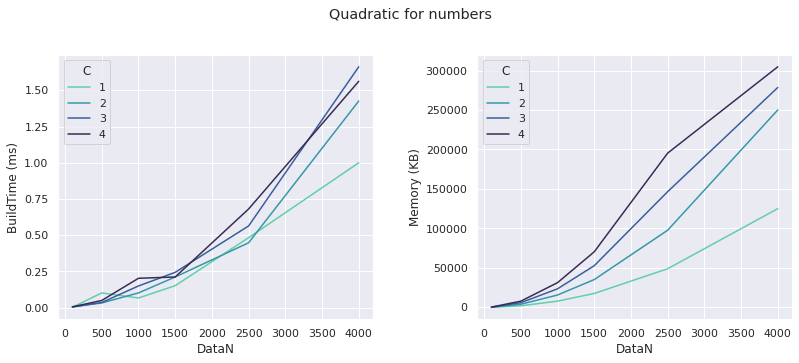

In [31]:
draw_results(quad_results[quad_results["DataType"]=='Numbers'], name='Quadratic for numbers')

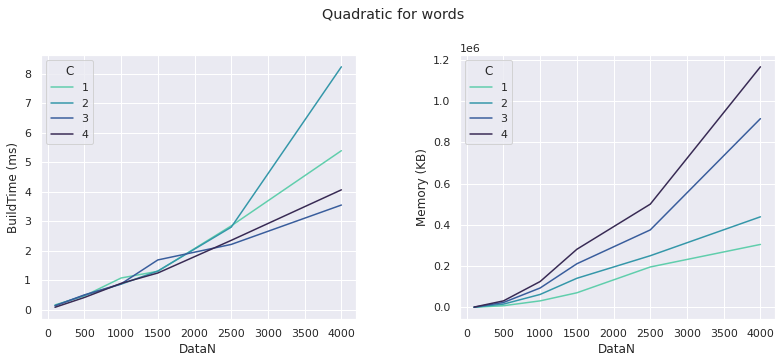

In [32]:
draw_results(quad_results[quad_results["DataType"]=='Words'], name='Quadratic for words')

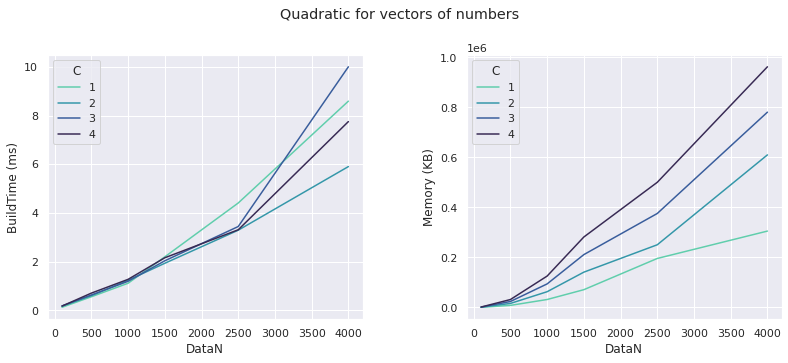

In [33]:
draw_results(quad_results[quad_results["DataType"]=='Vectors'], name='Quadratic for vectors of numbers')

**Вывод:** заметим, что потребление памяти при увеличении параметра $C$ растёт, как это и предполагалось. Так же стоит отметить, что чем меньше $C$ тем, обычно, больше времени затрачивается на создание хэш-таблицы, так как при меньшем $C$ вероятность коллизии увеличивается.

Оптимальным параметром $C$ для данного способа хэширования мы выбрали $C=3$.

### Double hashing

Размер первичной таблицы для Double алгоритма: $size = Cn$, при этом хэш-таблица считается успешно созданной, если $\sum_{k=0}^{m-1} l_k^2 \leq bound*n$ а для вторичных quadratic хэш-таблиц - $m^2$ где $C \in \{1,2,3,4\}$, $bound \in \{3,4,5\}$ $n$ - количество ключей, $m$ - количество коллизий в ячейке первичной таблицы.

In [79]:
double_files = [x for x in results_files if 'double' in x]

double_data = pd.DataFrame()
data = []

for file in double_files:
    data_ = pd.read_csv(file)
    data.append(data_)
double_results = pd.concat(data, ignore_index=True)

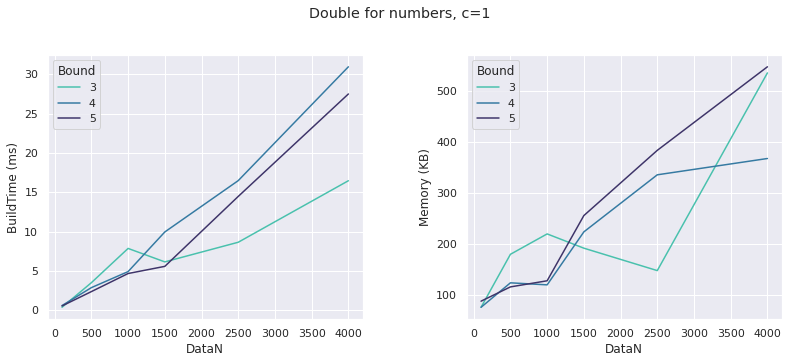

In [80]:
draw_results(
    double_results[(double_results["DataType"]=='Numbers') & (double_results["C"]==1)], name='Double for numbers, c=1', hue='Bound')

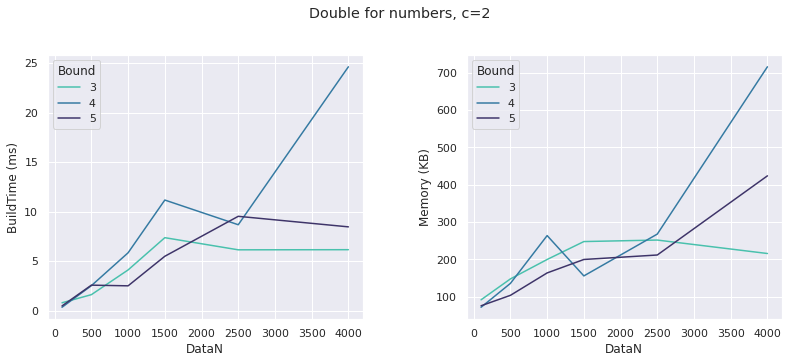

In [81]:
draw_results(
    double_results[(double_results["DataType"]=='Numbers') & (double_results["C"]==2)], name='Double for numbers, c=2', hue='Bound')

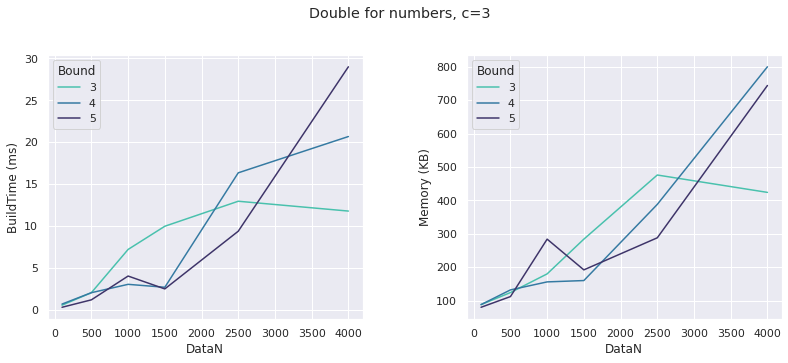

In [82]:
draw_results(
    double_results[(double_results["DataType"]=='Numbers') & (double_results["C"]==3)], name='Double for numbers, c=3', hue='Bound')

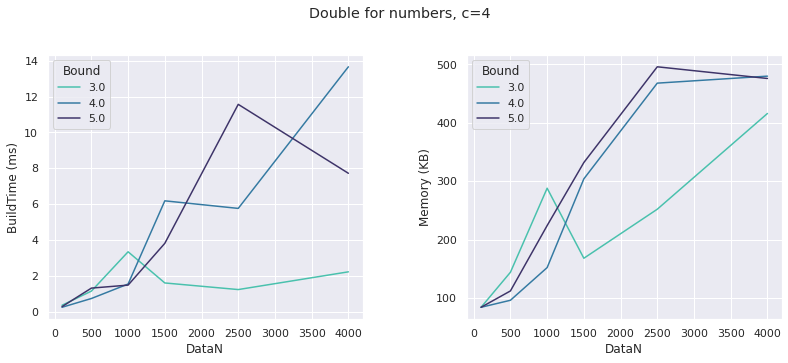

In [24]:
draw_results(
    double_results[(double_results["DataType"]=='Numbers') & (double_results["C"]==4)], name='Double for numbers, c=4', hue='Bound')

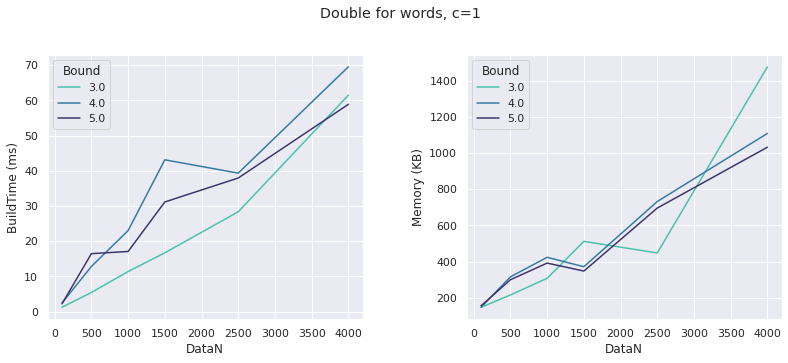

In [27]:
draw_results(double_results[(double_results["DataType"]=='Words') & (double_results["C"]==1)], name='Double for words, c=1', hue='Bound')

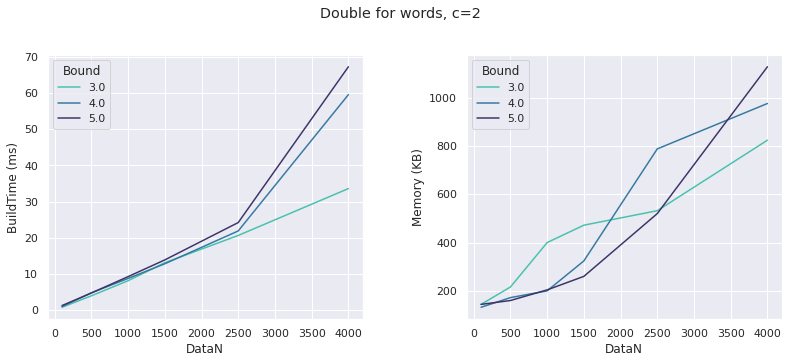

In [28]:
draw_results(double_results[(double_results["DataType"]=='Words') & (double_results["C"]==2)], name='Double for words, c=2', hue='Bound')

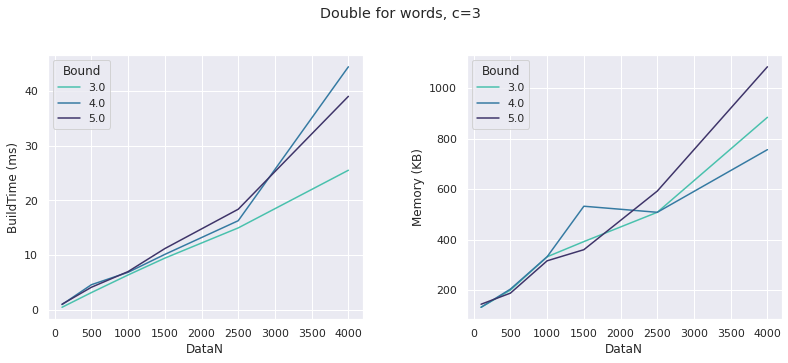

In [29]:
draw_results(double_results[(double_results["DataType"]=='Words') & (double_results["C"]==3)], name='Double for words, c=3', hue='Bound')

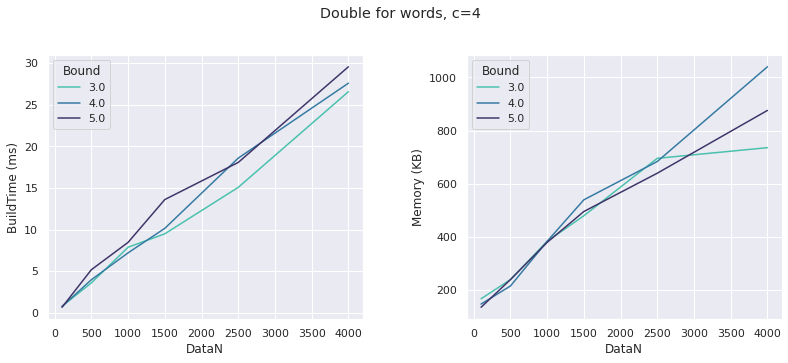

In [31]:
draw_results(double_results[(double_results["DataType"]=='Words') & (double_results["C"]==4)], name='Double for words, c=4', hue='Bound')

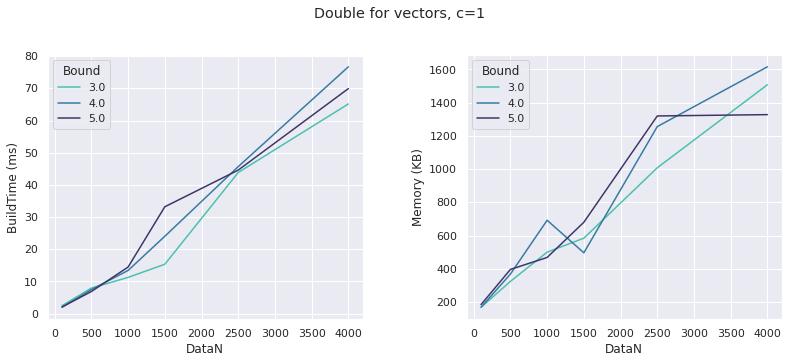

In [32]:
draw_results(double_results[(double_results["DataType"]=='Vectors') & (double_results["C"]==1)], name='Double for vectors, c=1', hue='Bound')

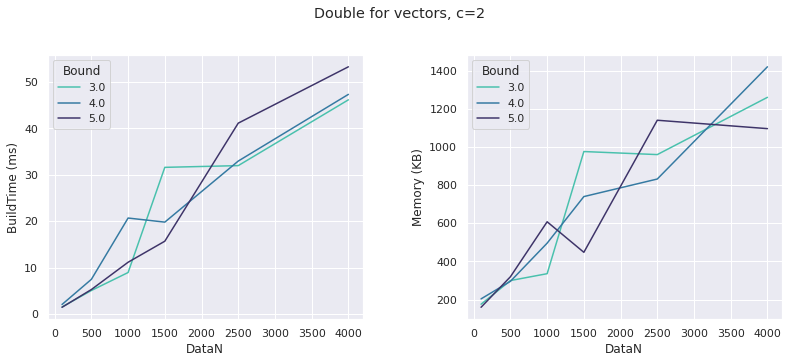

In [33]:
draw_results(double_results[(double_results["DataType"]=='Vectors') & (double_results["C"]==2)], name='Double for vectors, c=2', hue='Bound')

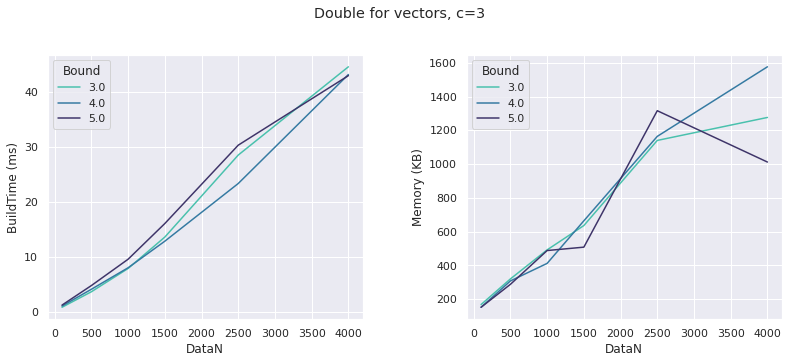

In [34]:
draw_results(double_results[(double_results["DataType"]=='Vectors') & (double_results["C"]==3)], name='Double for vectors, c=3', hue='Bound')

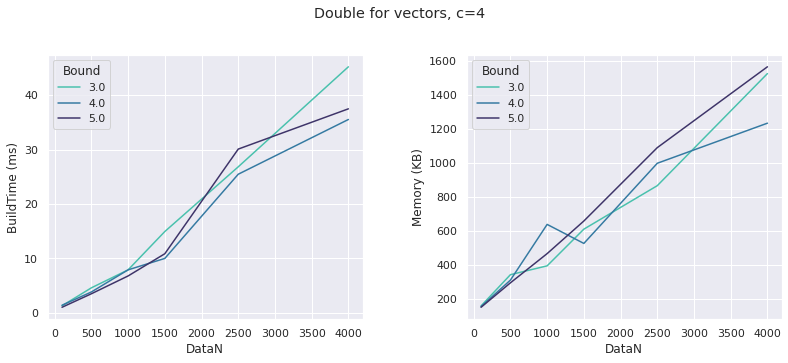

In [35]:
draw_results(double_results[(double_results["DataType"]=='Vectors') & (double_results["C"]==4)], name='Double for vectors, c=4', hue='Bound')

**Вывод:** стоит отметить, что при увеличении количества ключей $n$ затрачиваемая память не всегда растёт. Это можно объяснить различным количеством коллизий для разных данных. Также, при увеличении константы $C$ время заполнения хэш-таблицы падает, но затрачиваемая память, наоборот, растёт. Рост затрачиваемой памяти объясняется количеством коллизий - чем меньше первичная таблица, тем больше коллизий, которые разрешаются во вторичной таблице. 

Оптимальными параметрами для данного алгоритма, судя по графикам, мы выбрали верхнюю границу $bound=3$ и $C=4$. При таких параметрах, в среднем, время построения и затрачиваемая память хэш-таблицы наименьшие. 

### Graphic

Количество вершин для графового алгоритма: $V = Cn$, $C \in \{2,3,4\}$, $E=n$ - количество ключей.

In [98]:
graphic_files = [x for x in results_files if 'graph' in x]

data = []

for file in graphic_files:
    data_ = pd.read_csv(file)
    data.append(data_)

graphic_results = pd.concat(data, ignore_index=True)

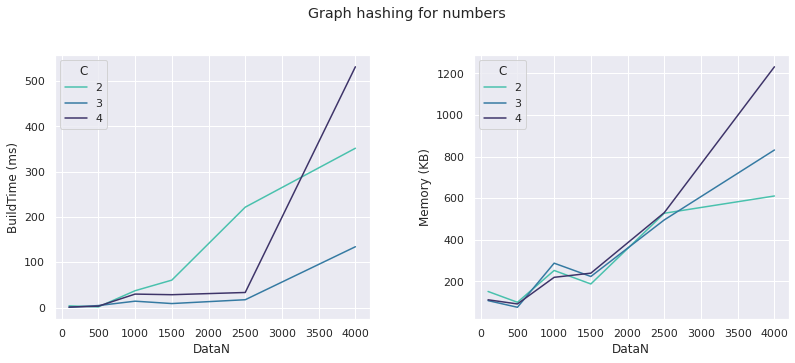

In [40]:
draw_results(graphic_results[graphic_results["DataType"]=='Numbers'], name='Graph hashing for numbers')

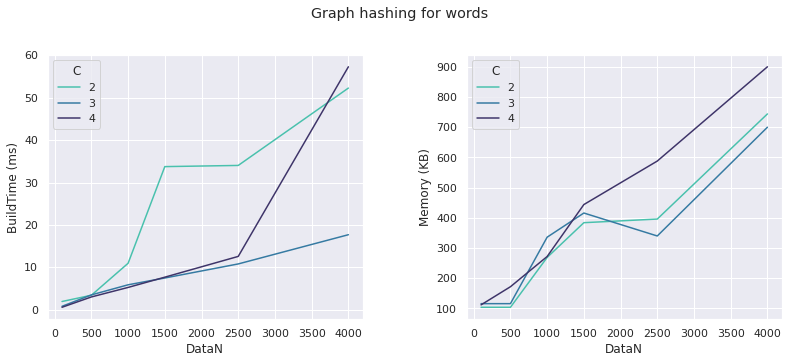

In [41]:
draw_results(graphic_results[graphic_results["DataType"]=='Words'], name='Graph hashing for words')

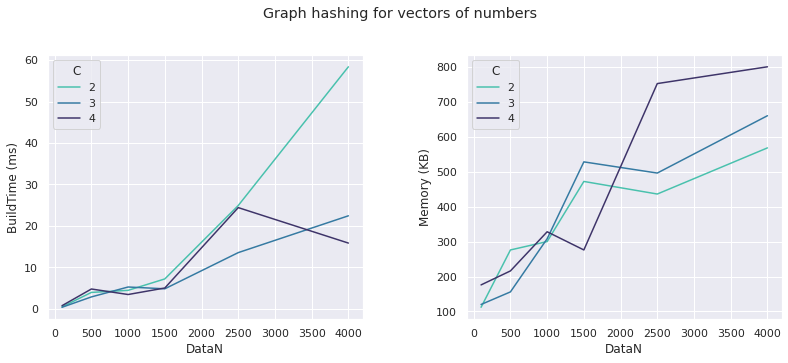

In [42]:
draw_results(graphic_results[graphic_results["DataType"]=='Vectors'], name='Graph hashing for vectors of numbers')

**Вывод**: при уменьшении параметра $C$ время построения графа растёт из-за увеличивающейся вероятности возникновения коллизии и поялвения цикла в графе. В свою очередь, потребляемая память при увеличении $C$ - растёт, так как создаётся больше вершин графа. 

Оптимальным параметром $C$ для данного алгоритма, судя по графикам, мы выбрали $C=3$. При таком $C$, в среднем, время построения и затрачиваемя память хэш-таблицы наименьшие. 

## Время поиска элемента

В Приложении 1 (в конце документа) можно найти все результаты замеров для всех алгоритмов. В данном пункте стоит сказать, что время поиска элемента не зависит от размера таблицы, ведь сложность поиска $O(1)$. В итоговой таблице это можно увидеть в стоблце `SearchTime`, значение которого всегда примерно равно 0.

## Сравнение алгоритмов между собой

In [69]:
def compare_data(data_type, c, name, exclude=None):
    data = []
    for file in results_files:
        algo = os.path.basename(file).split('_')[0]
        if algo == exclude:
            continue
        if data_type in file:
            data_ = pd.read_csv(file)
            
            data_.insert(loc=0, column='algo', value=[algo]*data_.shape[0])
            data.append(data_)
        
    data = pd.concat(data, ignore_index=True)
    data = data[data["C"]==c]
    
    draw_results(data, hue="algo", name=name)

In [70]:
best_c = 3

### Сравнение для чисел

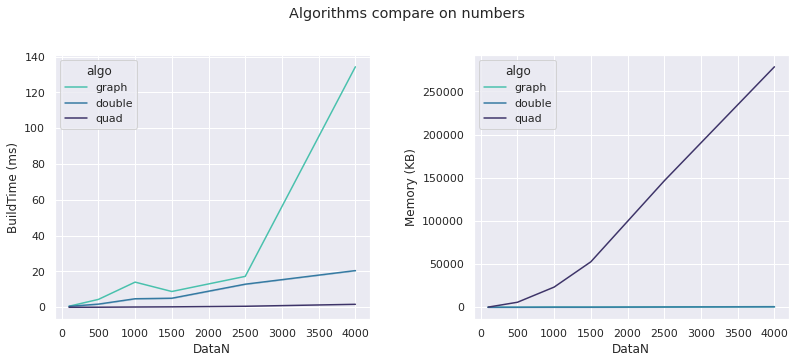

In [102]:
compare_data('num', name=f'Algorithms compare on numbers', c=best_c)

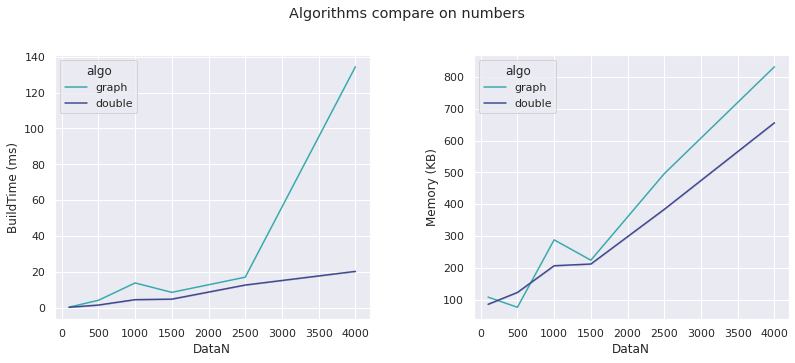

In [103]:
compare_data('num', name=f'Algorithms compare on numbers', c=best_c, exclude='quad')

### Сравнение для слов

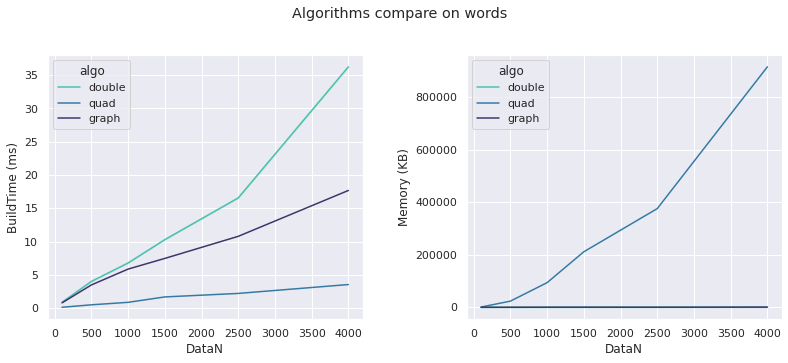

In [104]:
compare_data('word', name=f'Algorithms compare on words', c=best_c)

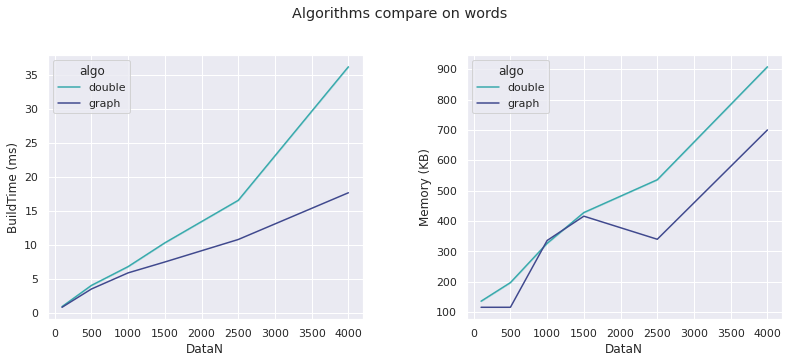

In [105]:
compare_data('word', name=f'Algorithms compare on words', c=best_c, exclude='quad')

### Сравнение для векторов из чисел

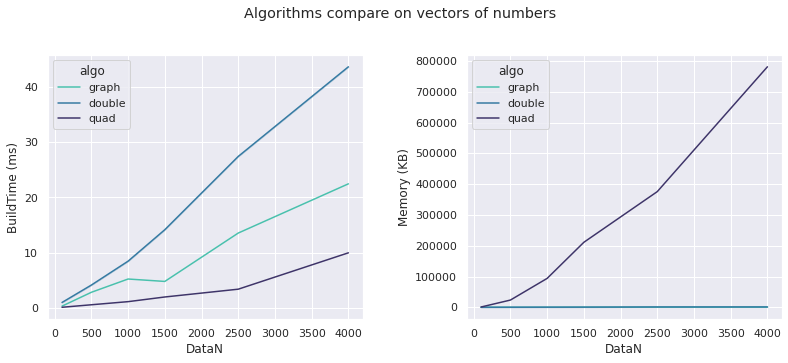

In [106]:
compare_data('vec', name=f'Algorithms compare on vectors of numbers', c=best_c)

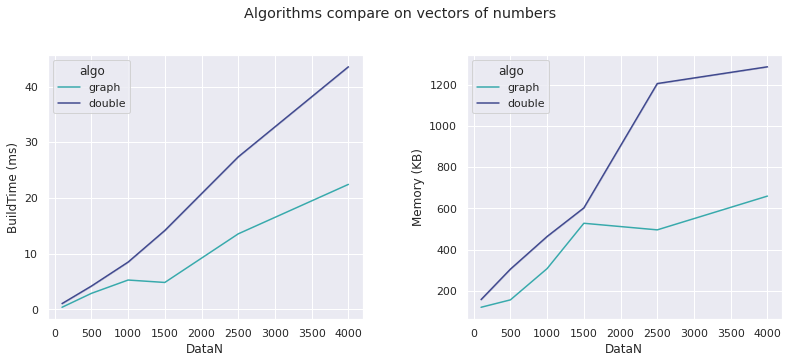

In [107]:
compare_data('vec', name=f'Algorithms compare on vectors of numbers', c=best_c, exclude='quad')

## Реальные данные

В данном разделе мы проверим три алгоритма хэширования на поэме Гомера "Илиада" (на англ. языке)

Перед тем как использовать алгоритмы хэширования, мы предварительно обработали входные данные - очистили от знаков пунктуации и спецсимволом, перевили все слова к нижнему регистру и лемматизировали слова.

In [100]:
real_data_path = '/home/maxim/Downloads/Telegram Desktop/iliada_measures.csv'
real_results = pd.read_csv(real_data_path)

In [101]:
real_results

,Method,DataN,C,BuildTime,Memory
0,Quadratic,1631,3,603.344,1175204
1,Double,1631,4,7.661,938652
2,Graphic,1631,3,4.882,926104


**Вывод:** не трудно заметить, что Quadratic алгоритм потребляет больше всего памяти, ровно как и в во всех предыдущих случаях. Время построяния хэш-таблицы максимальное среди трёх алгоритмов. 

Лучшим алгоритмом в эксперимента на "настоящих" данных является Graphic hashing - он потребляет меньше всего памяти и составляет хэш-таблицу быстрее всего

## Приложение 1. Результаты

In [61]:
pd.set_option('display.max_rows', None)

### Quadratic

In [94]:
quad_results

,DataType,DataN,C,BuildTime,SearchTime,Memory
0,Words,100,4,0.083,0.000,1320
1,Words,500,4,0.415,0.000,31332
2,Words,1000,4,0.894,0.000,125160
3,Words,1500,4,1.245,0.000,281496
4,Words,2500,4,2.352,0.000,500248
...,...,...,...,...,...,...
67,Words,500,2,0.489,0.000,15700
68,Words,1000,2,0.866,0.000,62588
69,Words,1500,2,1.312,0.000,140872
70,Words,2500,2,2.799,0.002,250244


### Double

In [93]:
double_results

,DataType,DataN,C,Bound,BuildTime,SearchTime,Memory
0,Words,100,2,5,1.306,0.001,144
1,Words,500,2,5,4.771,0.001,160
2,Words,1000,2,5,9.301,0.001,204
3,Words,1500,2,5,13.918,0.001,260
4,Words,2500,2,5,24.239,0.001,520
...,...,...,...,...,...,...,...
211,Words,500,4,3,3.584,0.000,240
212,Words,1000,4,3,7.870,0.001,384
213,Words,1500,4,3,9.488,0.000,480
214,Words,2500,4,3,15.075,0.000,696


### Graphic

In [99]:
graphic_results

,DataType,DataN,C,BuildTime,SearchTime,Memory
0,Vectors,100,3,0.389,0.000,120
1,Vectors,500,3,2.886,0.000,156
2,Vectors,1000,3,5.279,0.000,308
3,Vectors,1500,3,4.844,0.000,528
4,Vectors,2500,3,13.569,0.001,496
5,Vectors,4000,3,22.446,0.001,660
6,Numbers,100,3,0.587,0.000,108
7,Numbers,500,3,4.394,0.000,76
8,Numbers,1000,3,14.053,0.000,288
9,Numbers,1500,3,8.821,0.000,224
